In [69]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans


In [70]:
#open dataset.csv
df = pd.read_csv('dataset/dataset.csv')

#count row with geo.country = None
print(df['geo.country_code'].isnull().sum())

#count to each column if there are null values for row
#print(df.isnull().sum())
#drop rows with geo.country = None
df = df.dropna(subset=['geo.country_code'])

#print the number of rows and columns
#print(df.shape)
print(df.isnull().sum())
#print geo.country_code column
#print(df['geo.country_code'].value_counts())

109653
id                                            0
created_at                                    0
text                                          0
author.id                                     0
author.username                               0
author.name                                   7
author.public_metrics.followers_count         0
author.public_metrics.listed_count            0
author.verified                               0
conversation_id                               0
geo.coordinates.coordinates              785668
geo.coordinates.type                     785668
geo.country                                   0
geo.country_code                              0
geo.full_name                                 0
geo.geo.type                                  0
geo.id                                        0
geo.name                                      0
lang                                          0
public_metrics.like_count                     0
public_metrics.quote_count       

In [71]:
#view number of rows and columns
#print(df.shape)
#view first 5 rows
#display(df.head(10))

In [72]:
#plot the number of tweet to every year from created_at column and geo.country column
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['year'] = df['created_at'].dt.year
#df['year'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets to every year')
#plt.xlabel('Year')
#plt.ylabel('Number of tweets')
#plt.show()



In [73]:
continent_mapping = {
    'Africa': ['NG', 'ZA', 'EG', 'KE', 'DZ', 'MA', 'ET', 'TZ', 'GH', 'AO',
               'CI', 'CM', 'TN', 'UG', 'MZ', 'SN', 'MG', 'ZM', 'SD', 'ZW',
               'NA', 'MW', 'BW', 'ML', 'MR'],
    'Asia': ['CN', 'IN', 'ID', 'PK', 'BD', 'JP', 'PH', 'VN', 'TR', 'IR',
             'TH', 'MM', 'KR', 'IQ', 'AF', 'SA', 'UZ', 'YE', 'NP', 'MY',
             'LK', 'KP', 'KZ', 'SY', 'KH'],
    'Europe': ['RU', 'DE', 'GB', 'FR', 'IT', 'ES', 'UA', 'PL', 'RO',
               'NL', 'BE', 'GR', 'PT', 'CZ', 'HU', 'SE', 'BY', 'AT',
               'CH', 'BG', 'RS', 'DK', 'FI', 'SK', 'NO'],
    'North America': ['US', 'CA', 'MX', 'CU', 'HT', 'DO', 'JM', 'HN',
                      'SV', 'CR', 'NI', 'PA', 'GT', 'BS', 'TT', 'BZ',
                      'BB', 'HT', 'KN', 'AG', 'DM', 'LC', 'VC', 'GD'],
    'Oceania': ['AU', 'PG', 'NZ', 'FJ', 'SB', 'WS', 'FM', 'VU', 'KI',
                'TO', 'PW', 'MH', 'NR', 'TV', 'NU', 'CK', 'KI', 'AS',
                'TK', 'WF', 'PN', 'PF', 'GU', 'NR', 'TV']
}

inverted_mapping = {code: continent for continent, codes in continent_mapping.items() for code in codes}
df['Continent'] = df['geo.country_code'].map(inverted_mapping)
#display(df['Continent'])

#### Primo crollo 18/05/2020

In [74]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_1 = df[(df['created_at'] >= '2021-05-07') & (df['created_at'] <= '2021-05-19')]
df_1 = df_1.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_1 = df_1.reset_index(drop=True)
display (df_1.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1394439363971493888,2021-05-17T23:47:06.000Z,I’ve never been more confident in my decision ...,43775786,stoolpresidente,Dave Portnoy,2883361,7200,False,1394439363971493888,...,01a9a39529b27f36,Manhattan,en,14878,422,1584,2863,NaN,replied_to,North America
1,1394372595282231297,2021-05-17T19:21:47.000Z,At 3:45 I will be announcing my new shit coin ...,43775786,stoolpresidente,Dave Portnoy,2883361,7200,False,1394372595282231297,...,01a9a39529b27f36,Manhattan,en,9898,220,1251,529,NaN,NaN,North America
2,1394484836044312576,2021-05-18T02:47:47.000Z,Thank you to the 1.5 million people who watche...,43775786,stoolpresidente,Dave Portnoy,2883361,7200,False,1394484836044312576,...,01a9a39529b27f36,Manhattan,en,6858,96,632,1221,"[{""type"": ""quoted"", ""id"": ""1394379356487757834""}]",NaN,North America
3,1394430356904980482,2021-05-17T23:11:19.000Z,I honestly didn’t know there were guys like @W...,43775786,stoolpresidente,Dave Portnoy,2883361,7200,False,1394430356904980482,...,01a9a39529b27f36,Manhattan,en,5247,76,474,649,NaN,quoted,North America
4,1394403990964641792,2021-05-17T21:26:32.000Z,Elon trashes crypto based on how the wind blow...,43775786,stoolpresidente,Dave Portnoy,2883361,7200,False,1394403990964641792,...,01a9a39529b27f36,Manhattan,en,2817,39,335,279,"[{""type"": ""quoted"", ""id"": ""1394403659056885761...",replied_to,North America
5,1394352917390446593,2021-05-17T18:03:35.000Z,"Les frères je ne suis pas un trader, je n’y co...",2798855717,TeufeurSoff,TeufeurS,403677,236,True,1394352917390446593,...,1d834adff5d584df,Malta,fr,957,1,58,53,NaN,NaN,NaN
6,1393263073243418627,2021-05-14T17:52:56.000Z,#safemoon is the future and I am already livin...,1354662163550498816,therealmrcrypto,MrCrypto ☕️,37270,95,False,1393263073243418627,...,527497cd9f63a4d5,Chinatown,en,932,3,35,153,NaN,NaN,North America
7,1393877315931705349,2021-05-16T10:33:43.000Z,"@cvpayne Thank you, Mr.Payne. Your dedication ...",281349131,sunshinelu24,Sunny LU @VeChain,105958,505,True,1393710940684750851,...,00059b04495a7e37,广东,en,874,8,18,143,"[{""type"": ""replied_to"", ""id"": ""139371094068475...",NaN,Asia
8,1393354454641135622,2021-05-14T23:56:03.000Z,The more I understand #Crypto the more I like ...,92639420,marceloclaure,Marcelo Claure,297009,893,True,1393354454641135622,...,01a9a39529b27f36,Manhattan,en,638,5,46,36,NaN,NaN,North America
9,1392036971346759681,2021-05-11T08:40:51.000Z,People are saying Terra $LUNA is like $ETH in ...,3908383092,stablechen,Will Chen 🌖,65903,341,False,1392036971346759681,...,5ef5b7f391e30aff,Berkeley,en,631,13,25,127,NaN,NaN,North America


In [75]:
#plot the number of tweet in every day from created_at between 2021/05/11 to 2021/05/24
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['day'] = df['created_at'].dt.day
#df['day'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets in every day')
#plt.xlabel('Day')
#plt.ylabel('Number of tweets')
#plt.show()



In [76]:
#create a plot with the id of twitter and the number of likes, retweets and replies
#df=pd.DataFrame(df,columns=["id","public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"])
#df.plot(x="id", y=["public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"], kind="bar")
#plt.title('')
#plt.xlabel('Id')
#plt.ylabel('Number of likes, replies and retweets')
#plt.show()



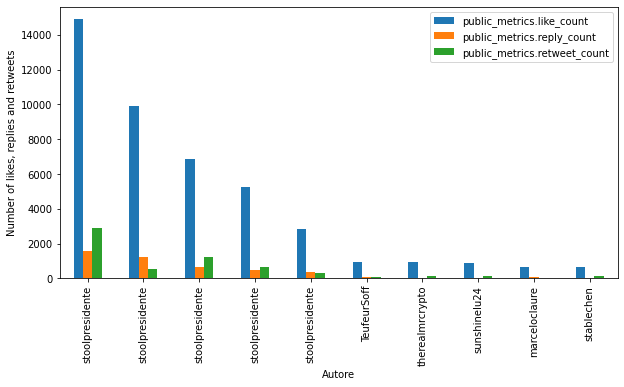

In [77]:
#df_1=pd.DataFrame(df_1,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count', 'geo.country_code'])
# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_1.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


In [85]:
### OBIETTIVO 4 ###
df ['Continent'] = df['geo.country_code'].map(inverted_mapping)
grouped = df.groupby('Continent')
#sum of likes, replies and retweets for every country in the continent
def plot_continent_sum(df, grouped):
    for continent, data in grouped:
        # Suddivisione del dataset per paese all'interno del continente corrente
        country_grouped = data.groupby('geo.country')

        # Calcolo delle somme dei like, commenti e retweet per ogni paese nel continente
        likes_sum = country_grouped['public_metrics.like_count'].sum()
        reply_sum = country_grouped['public_metrics.reply_count'].sum()
        retweet_sum = country_grouped['public_metrics.retweet_count'].sum()

        # Creazione delle posizioni delle barre per il grafico
        bar_width = 0.3
        index = np.arange(len(likes_sum.index))

        # Creazione del grafico a barre raggruppate
        plt.figure(figsize=(12, 6))
        plt.bar(index, likes_sum.values, width=bar_width, label='Like')
        plt.bar(index + bar_width, reply_sum.values, width=bar_width, label='Commenti')
        plt.bar(index + 2 * bar_width, retweet_sum.values, width=bar_width, label='Retweet')

        # Configurazione del grafico
        plt.title(f'Sum of likes, comments and reply for each country - {continent}')
        plt.xlabel('Paese')
        plt.ylabel('Interazioni')
        plt.xticks(index, likes_sum.index, rotation='vertical')
        plt.legend()

#means of likes, replies and retweets for each country in the continent
def plot_continent_mean(df, grouped):
    for continent, data in grouped:
        # Suddivisione del dataset per paese all'interno del continente corrente
        country_grouped = data.groupby('geo.country')

        # Calcolo delle somme dei like, commenti e retweet per ogni paese nel continente
        likes_sum = country_grouped['public_metrics.like_count'].mean()
        reply_sum = country_grouped['public_metrics.reply_count'].mean()
        retweet_sum = country_grouped['public_metrics.retweet_count'].mean()

        # Creazione delle posizioni delle barre per il grafico
        bar_width = 0.3
        index = np.arange(len(likes_sum.index))

        # Creazione del grafico a barre raggruppate
        plt.figure(figsize=(12, 6))
        plt.bar(index, likes_sum.values, width=bar_width, label='Like')
        plt.bar(index + bar_width, reply_sum.values, width=bar_width, label='Commenti')
        plt.bar(index + 2 * bar_width, retweet_sum.values, width=bar_width, label='Retweet')

        # Configurazione del grafico
        plt.title(f'Mean of likes, comments and reply for each country - {continent}')
        plt.xlabel('Paese')
        plt.ylabel('Interazioni')
        plt.xticks(index, likes_sum.index, rotation='vertical')
        plt.legend()


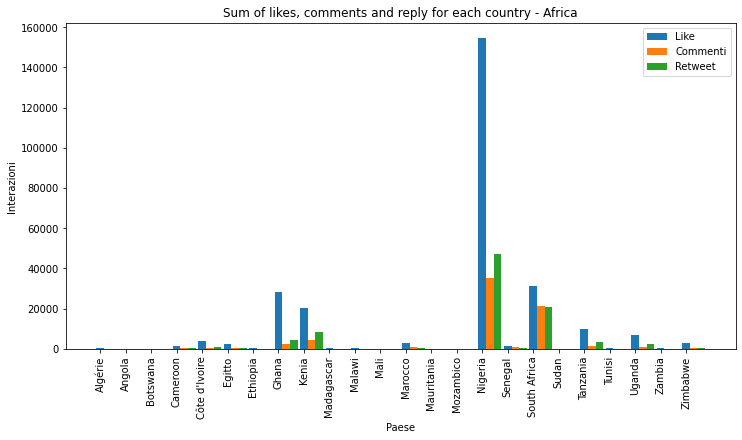

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

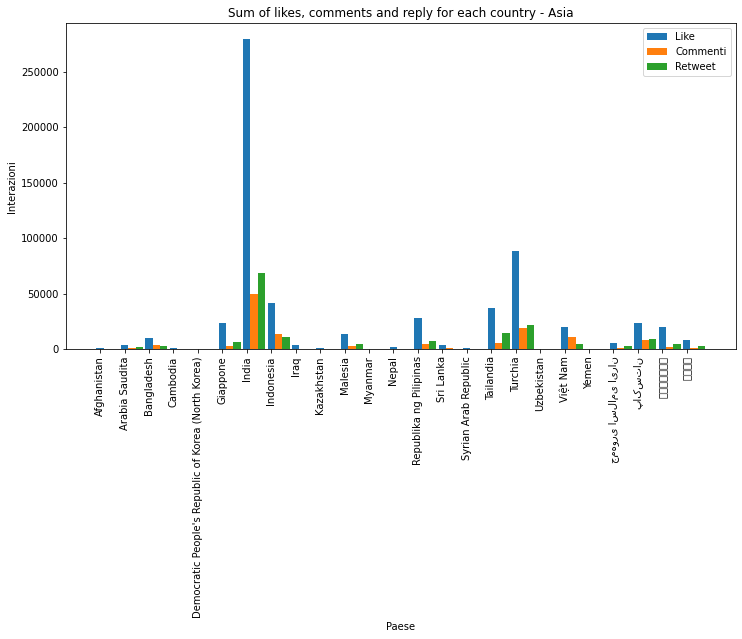

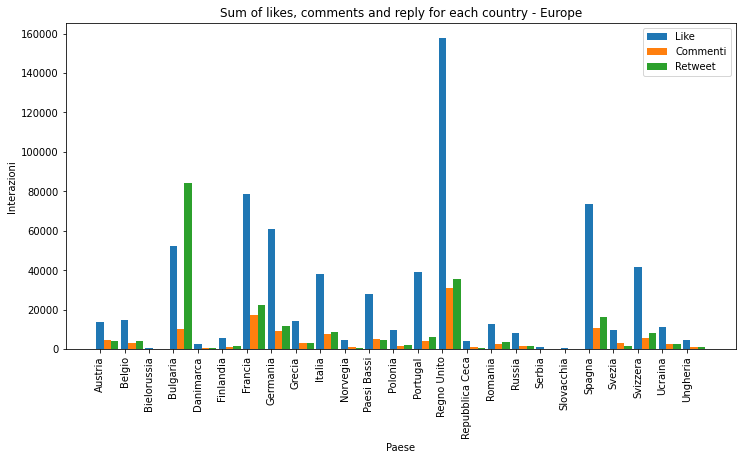

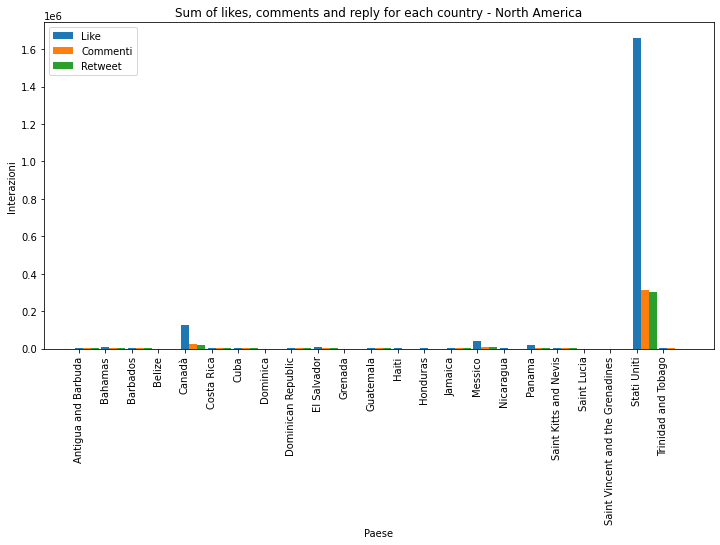

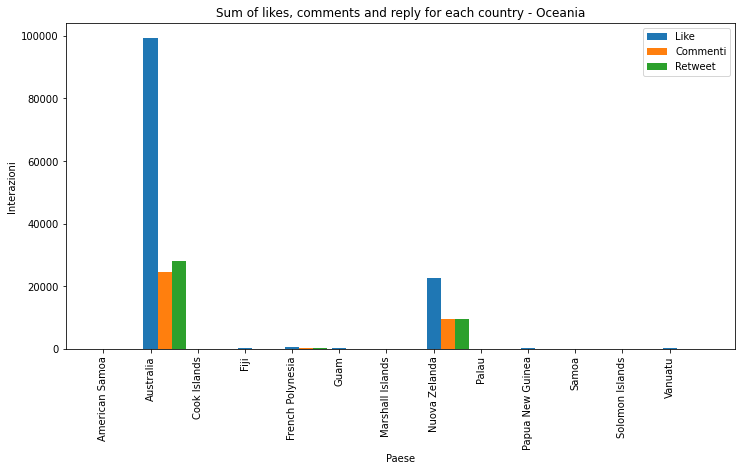

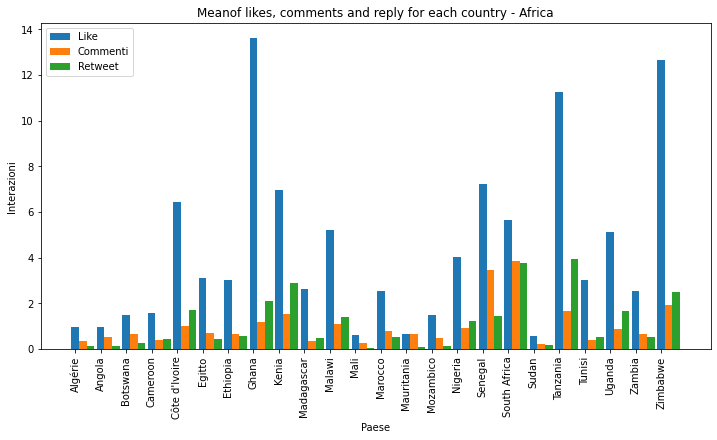

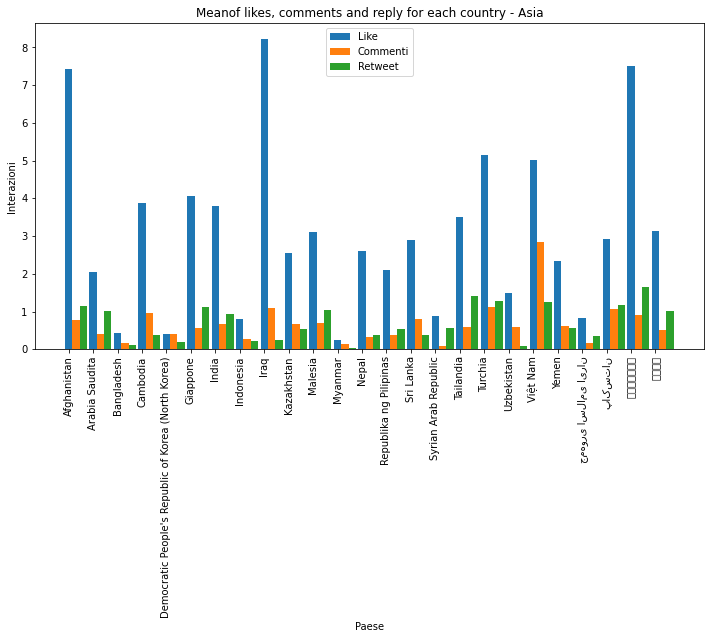

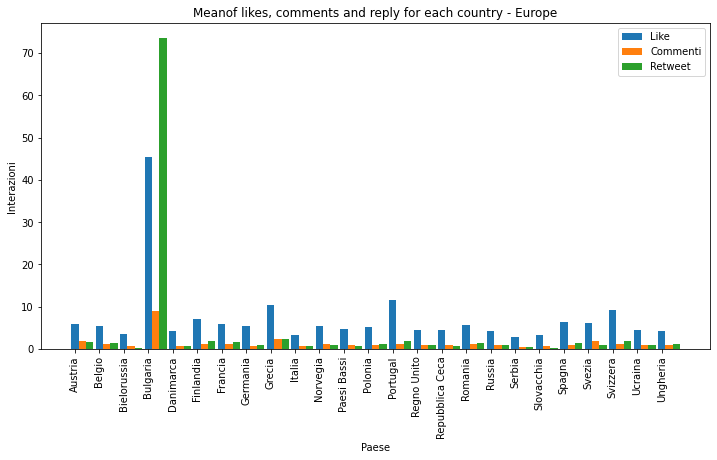

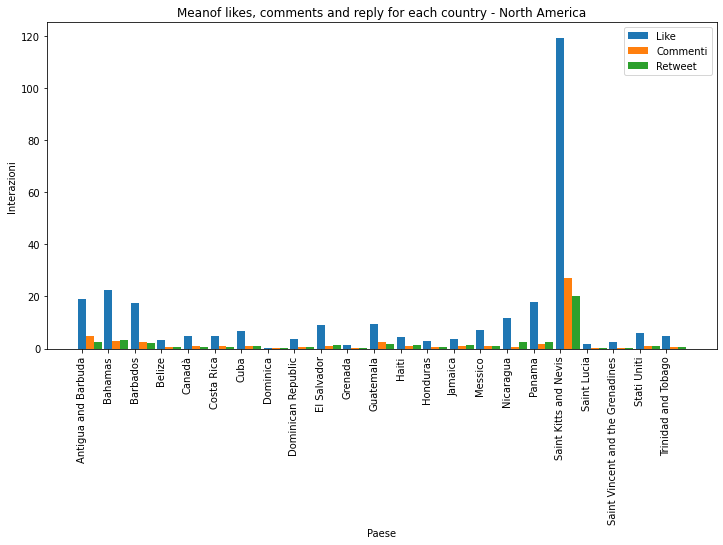

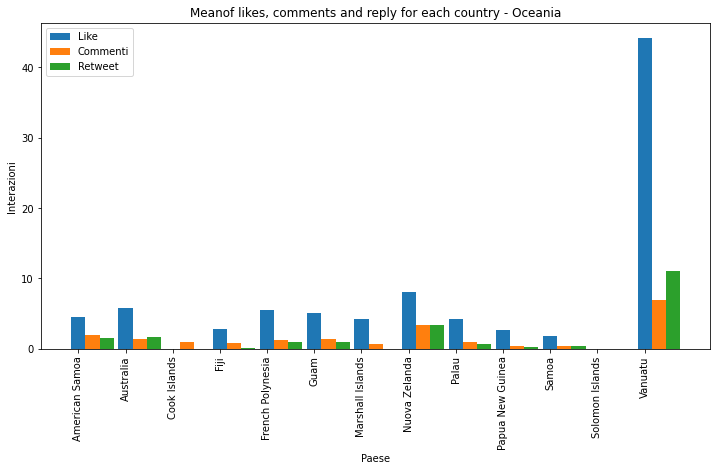

In [86]:
### OBIETTIVO 4 ###
plot_continent_sum(df_1, grouped)
plot_continent_mean(df_1, grouped)

#### Incremento valore 22/09/2021 04/10/2021

In [87]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_2 = df[(df['created_at'] >= '2021-09-22') & (df['created_at'] <= '2021-10-04')]
df_2 = df_2.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_2 = df_2.reset_index(drop=True)
display (df_2.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1441422156731072514,2021-09-24T15:19:57.000Z,Crypto is so speculative. That’s why I prefer ...,557440724,anothercohen,Alex Cohen,108429,850,False,1441422156731072514,...,3ad0f706b3fa62a8,Palo Alto,en,1129,15,33,51,NaN,NaN,North America
1,1441560313346736138,2021-09-25T00:28:56.000Z,J’apprends par des potes à Nice que un mec que...,2798855717,TeufeurSoff,TeufeurS,403683,236,True,1441560313346736138,...,f0af1239cbebb474,Cipro,fr,845,1,27,24,NaN,NaN,NaN
2,1441028610358398984,2021-09-23T13:16:08.000Z,Crypto lifestyle https://t.co/IlsiAKIwxq,1152137593544462336,AlexAndryunin,Alex Andryunin,28294,22,False,1441028610358398984,...,001907e868d06e24,دبي,en,827,1,1,29,NaN,NaN,NaN
3,1443919920404783105,2021-10-01T12:45:10.000Z,Se mina el primer #Bitcoin desde #ElSalvador H...,69934541,monicataher,Mónica Taher,77122,632,False,1443919920404783105,...,011231ce0bf557b2,Antiguo Cuscatlan,es,813,19,45,188,NaN,NaN,North America
4,1441416892476891149,2021-09-24T14:59:02.000Z,The United States of America has been handed a...,11730322,jordanfried,Jordan Fried,50666,297,True,1441416892476891149,...,01a9a39529b27f36,Manhattan,en,702,14,26,160,NaN,NaN,North America
5,1441505466895437825,2021-09-24T20:50:59.000Z,If someone is curious to learn more about cryp...,19032289,nateliason,Nat Eliason,67955,1967,False,1441505466895437825,...,c3f37afa9efcf94b,Austin,en,510,11,43,38,NaN,NaN,North America
6,1442638168973479944,2021-09-27T23:51:57.000Z,The number of people I met at #Mainnet2021 tha...,981208355115974656,TrustlessState,DavidHoffman.bedrock 🏴🦇🔊🏴,175157,2871,False,1442638168973479944,...,a592bd6ceb1319f7,San Diego,en,462,3,18,19,NaN,NaN,North America
7,1442837016790638598,2021-09-28T13:02:06.000Z,This morning my son surprised his mom and I by...,8956182,Hadley,Hadley,37489,377,True,1442837016790638598,...,94965b2c45386f87,New York,en,446,5,17,6,NaN,NaN,North America
8,1442826457051455491,2021-09-28T12:20:08.000Z,We are content creators and the future is our ...,2817161603,Cavaleria,Cavaleria.ro,11665,8,False,1442826457051455491,...,01c86d355e71b956,Bucarest,en,394,3,8,84,NaN,NaN,Europe
9,1443270392890761230,2021-09-29T17:44:10.000Z,THE GARDEN OF ETH🍇🤲🏼🪐\n\n#TheSecondRenaissance...,1208887485151010816,ykhulio,Ξ𝖍𝖚𝖑𝖎𝖔,12266,31,False,1443270392890761230,...,007d6147297477e7,Harare,en,330,7,22,62,NaN,NaN,Africa


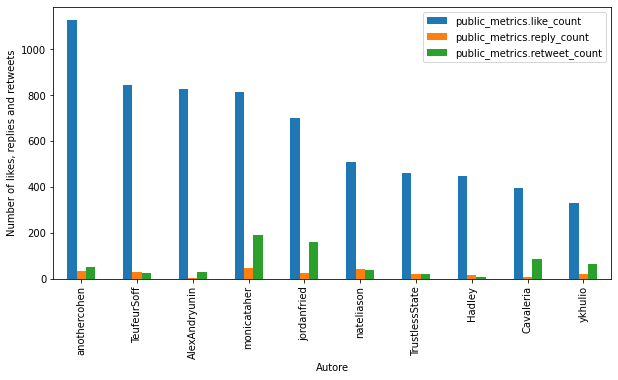

In [88]:
df_2=pd.DataFrame(df_2,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_2.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


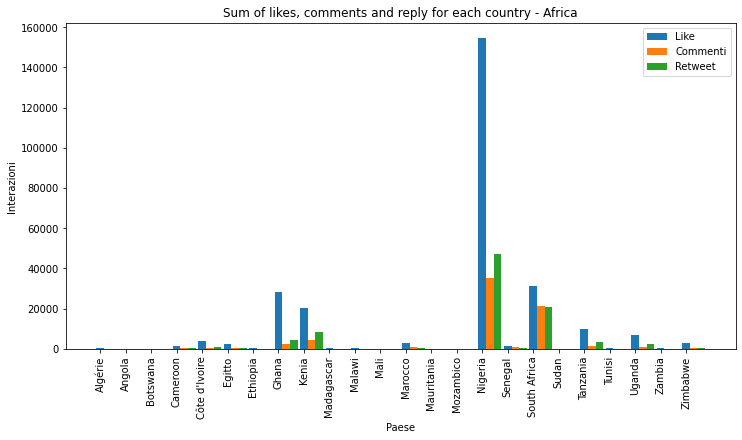

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

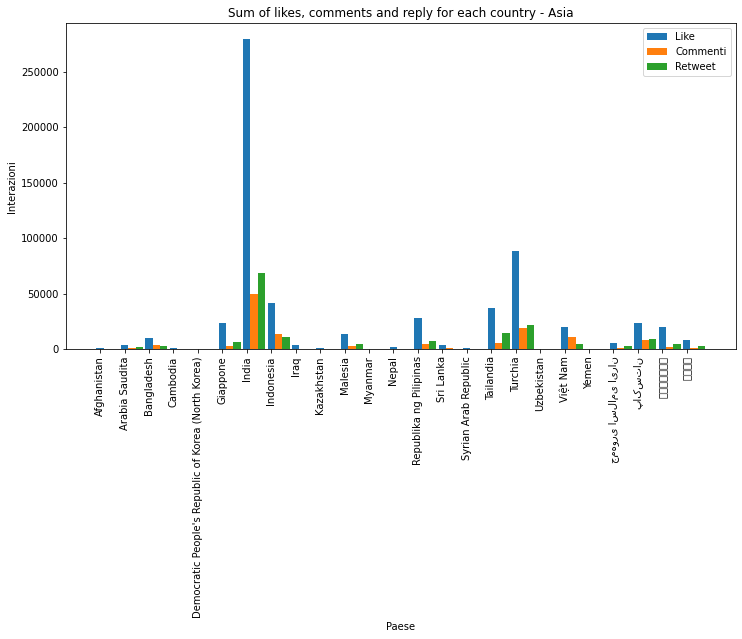

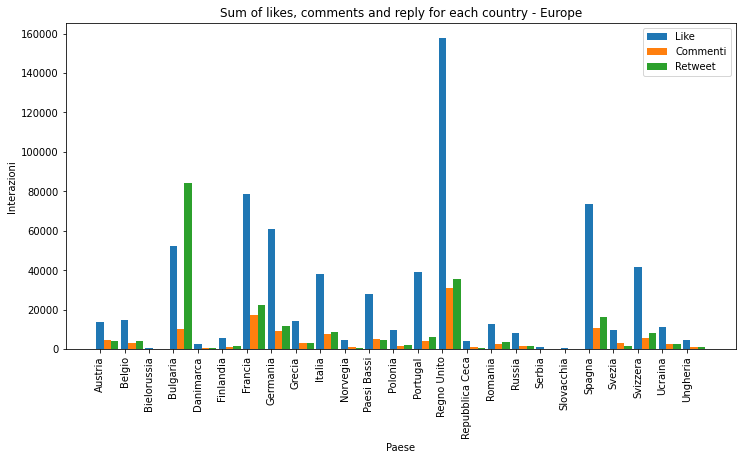

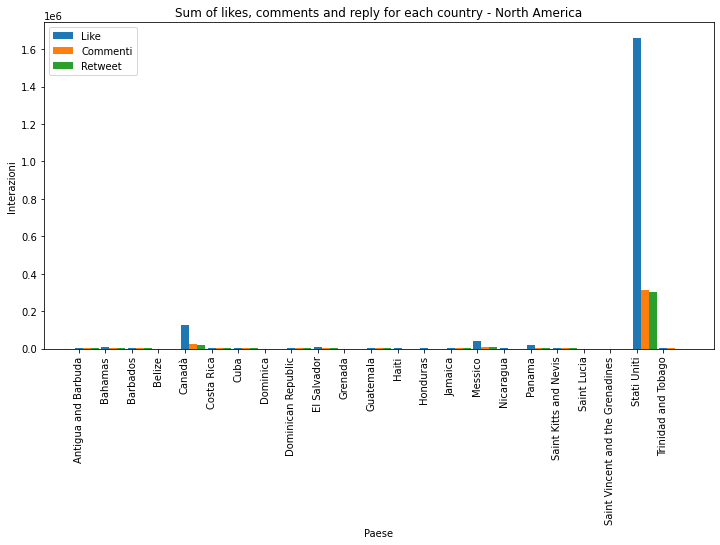

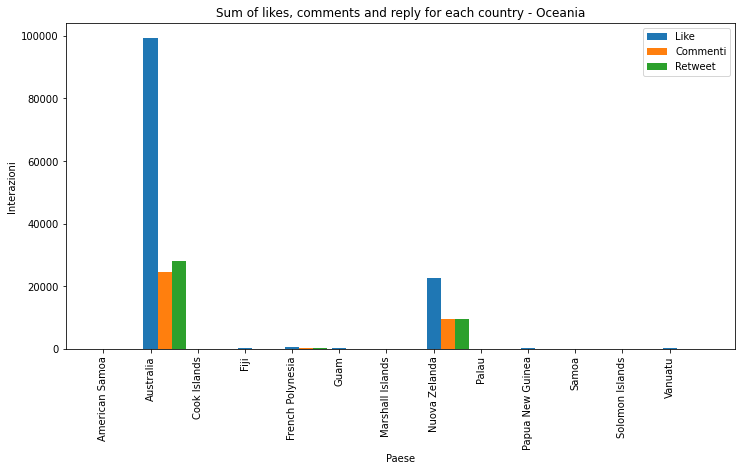

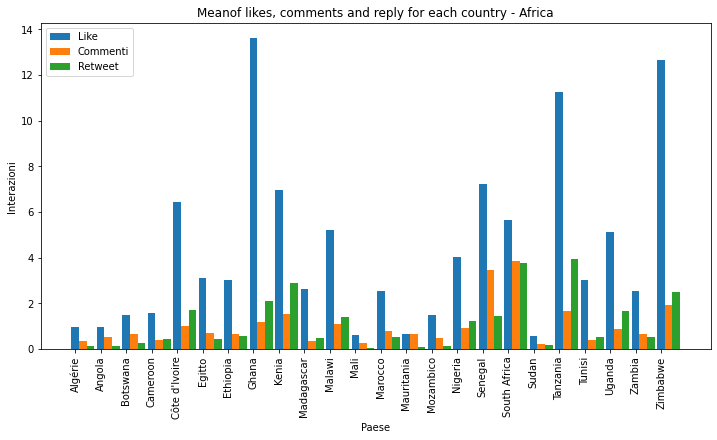

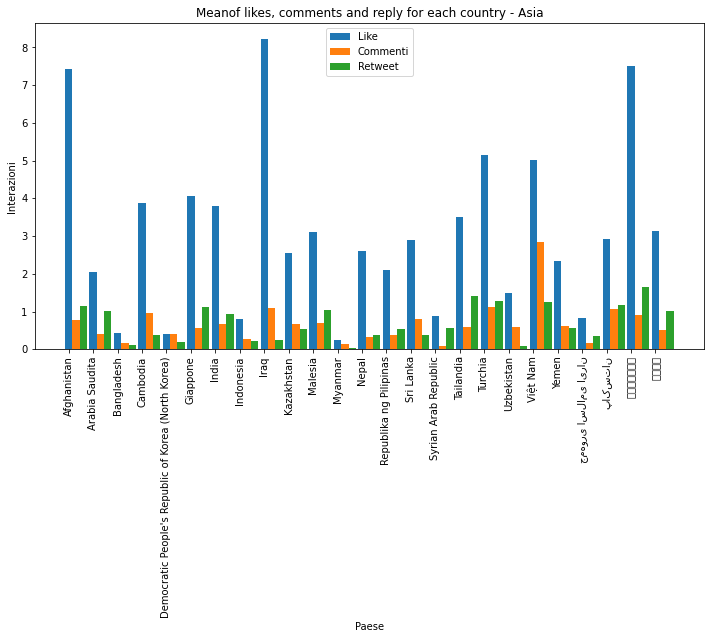

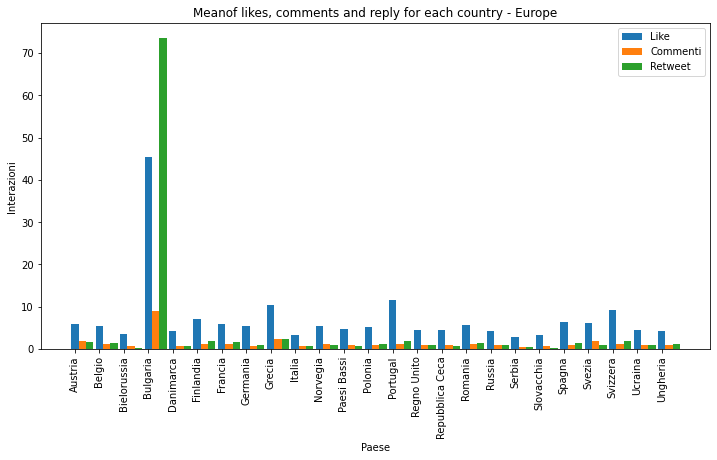

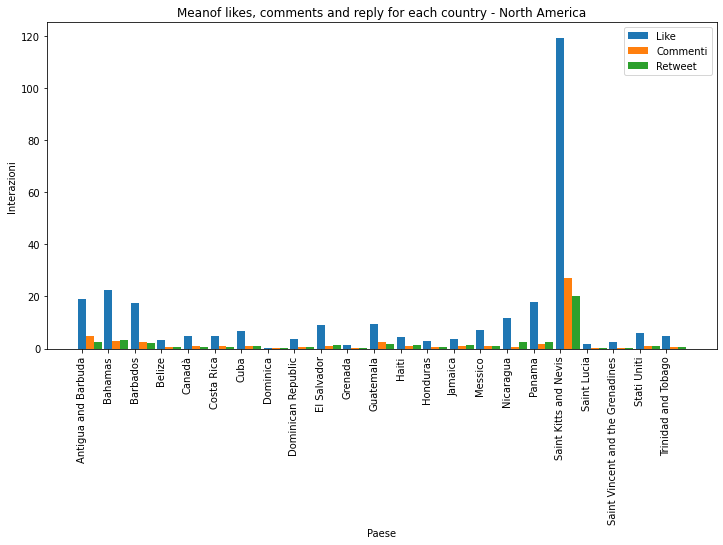

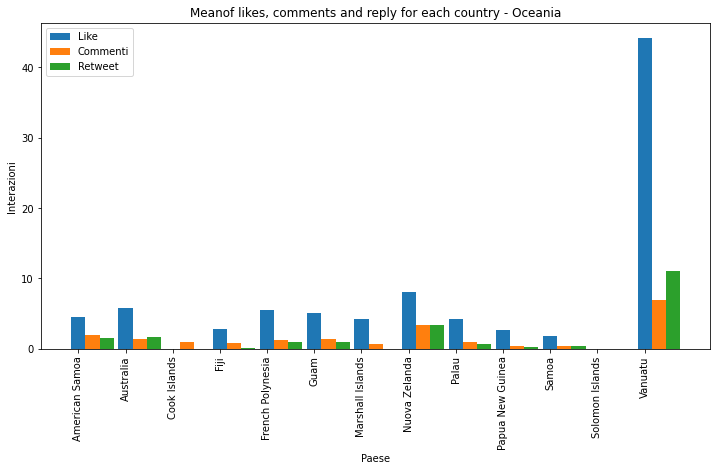

In [89]:
### OBIETTIVO 4 ###
plot_continent_sum(df_2, grouped)
plot_continent_mean(df_2, grouped)

#### Crollo 16/01/2022 - 05/02/2022

In [91]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_3 = df[(df['created_at'] >= '2022-02-20') & (df['created_at'] <= '2022-02-25')]
df_3 = df_3.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_3 = df_3.reset_index(drop=True)
display (df_3.head(15))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1496515006367772676,2022-02-23T15:59:16.000Z,So now the Canadian government is claiming the...,16187240,jonkay,Jonathan Kay,70396,859,False,1496515006367772676,...,3797791ff9c0e4c6,Toronto,en,732,8,18,213,NaN,NaN,North America
1,1495629869308608513,2022-02-21T05:22:02.000Z,It’s so inspiring to chat with @VitalikButerin...,1100494934807904256,victorJi15,"victorji.eth (Manta, Calamari)",2118,35,False,1495629869308608513,...,b49b3053b5c25bf5,Denver,en,584,14,39,78,NaN,NaN,North America
2,1495563534931206144,2022-02-21T00:58:27.000Z,if nothing else blockchain has given hackers t...,22775788,dannyodwyer,danny o'dwyer,111313,1235,True,1495563534931206144,...,432daa3153c5fef9,San Mateo,en,558,0,6,51,"[{""type"": ""quoted"", ""id"": ""1495246939838840840""}]",NaN,North America
3,1495567775657611273,2022-02-21T01:15:18.000Z,"Friendly reminder: always check the ""from"" add...",14031032,AdamSinger,Adam Singer,80497,3078,True,1495567775657611273,...,e0060cda70f5f341,Texas,en,540,5,34,75,NaN,NaN,North America
4,1496706855372001284,2022-02-24T04:41:36.000Z,Una de las grandes razones para construir y ap...,189230702,PabloSabbatella,pablito.eth 🦇🔊 🔜 ETHDenver ☃️,61011,634,False,1496706855372001284,...,018f1cde6bad9747,Ciudad Autónoma de Buenos Aires,es,462,8,23,64,NaN,NaN,NaN
5,1495887951594668037,2022-02-21T22:27:34.000Z,Decentralize Finance\nDecentralize Government\...,1090016912669581315,ShannonBrayNC,Shannon Bray,63684,80,True,1495887951594668037,...,5e7f701fa7e8322a,Holly Springs,en,402,2,850,313,NaN,NaN,North America
6,1495287284043763714,2022-02-20T06:40:44.000Z,Probably the first ever #AxieInfinity Meetup i...,2241216430,godwin_france,"Saharan-sub (🦊,🦊)",7513,14,False,1495287284043763714,...,0065f09a6666479e,Ibadan,en,389,6,42,52,NaN,NaN,Africa
7,1495347000136675331,2022-02-20T10:38:01.000Z,What a crazy weekend for crypto and NFTs in ge...,35910153,dandymich,MartinAlcantara.eth,1407,45,False,1495347000136675331,...,f0af1239cbebb474,Cipro,en,385,5,20,20,NaN,NaN,NaN
8,1496526162415206405,2022-02-23T16:43:35.000Z,Woke up 20k richer 🙇‍♂️📈 #SaitaMask 🐺; I can’t...,1319896021586104320,tmc_mccarty,TMC_McCarty,10306,27,False,1496526162415206405,...,e4a0d228eb6be76b,Philadelphia,en,346,1,95,92,NaN,NaN,North America
9,1496445714708467715,2022-02-23T11:23:55.000Z,@azfarephr @Khairykj Well a real meme lord don...,15685290,rezarazali,Reza Razali 👨🏻‍💻🇲🇾,13445,60,False,1496445286688124929,...,001907e868d06e24,دبي,en,334,0,2,3,"[{""type"": ""replied_to"", ""id"": ""149644554431067...",NaN,NaN


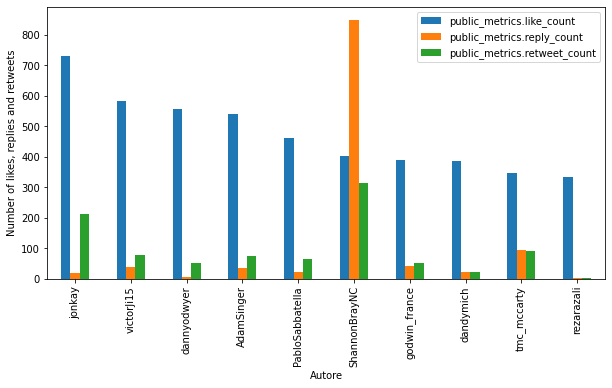

In [92]:
#df_3=pd.DataFrame(df_3,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df3_sorted = df_3.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df3_top10 = df1_sorted.head(10)
# Plotta il dataframe
df3_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


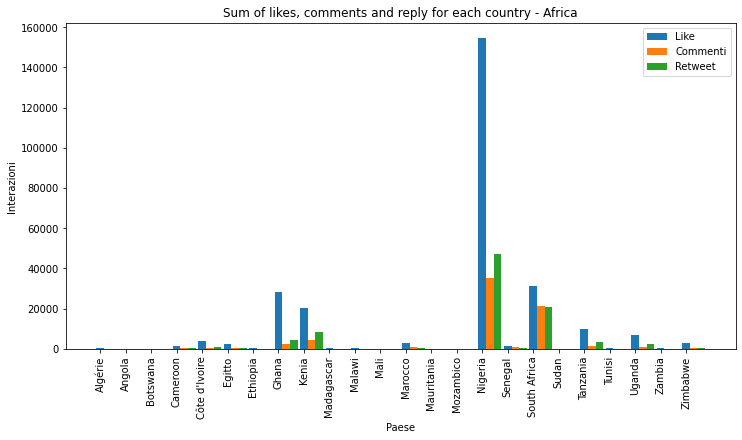

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

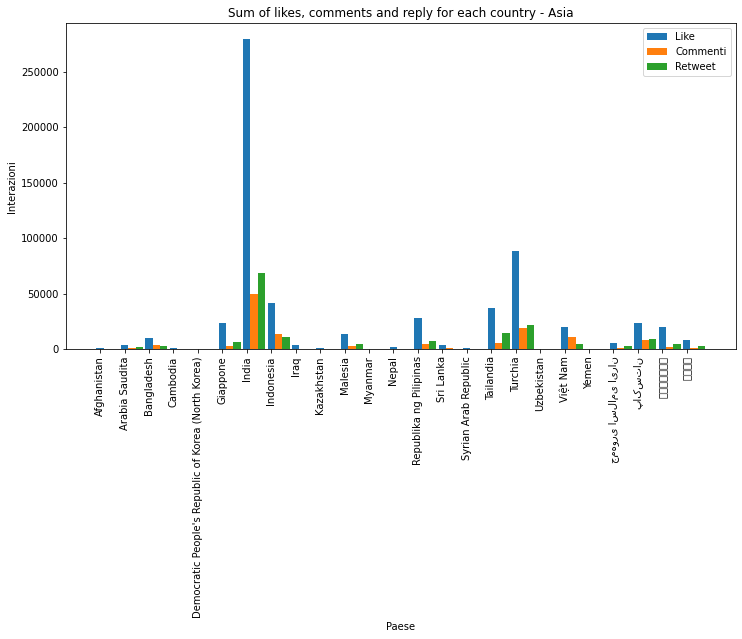

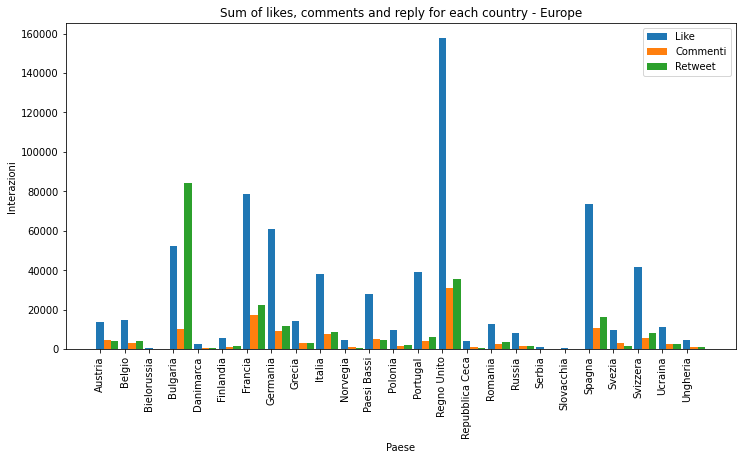

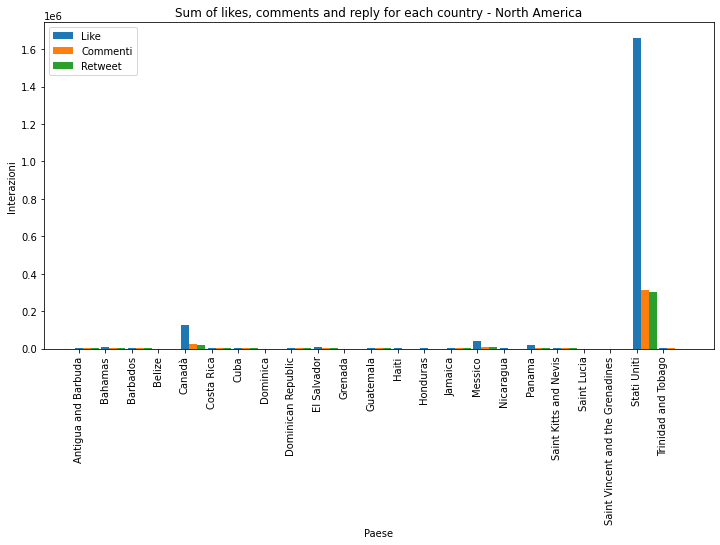

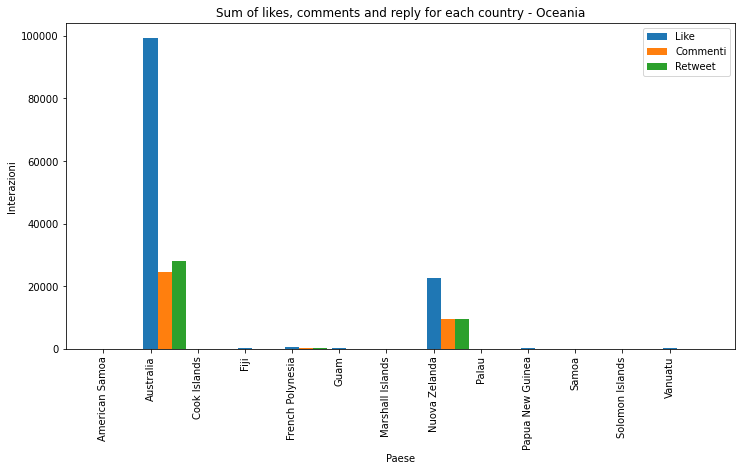

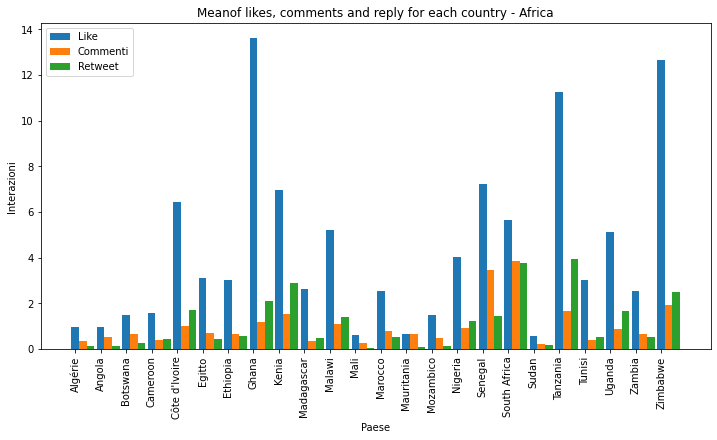

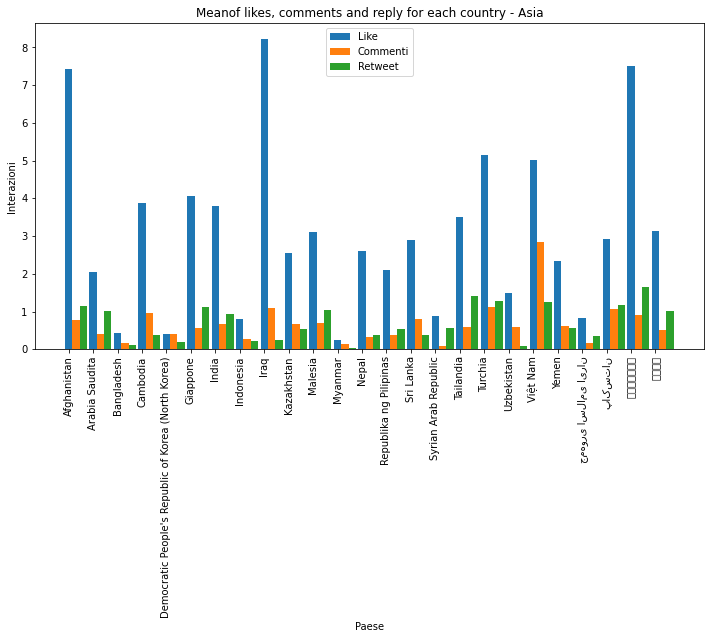

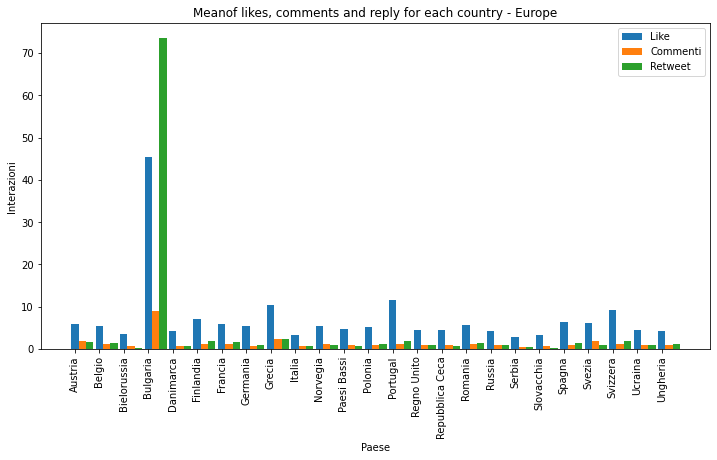

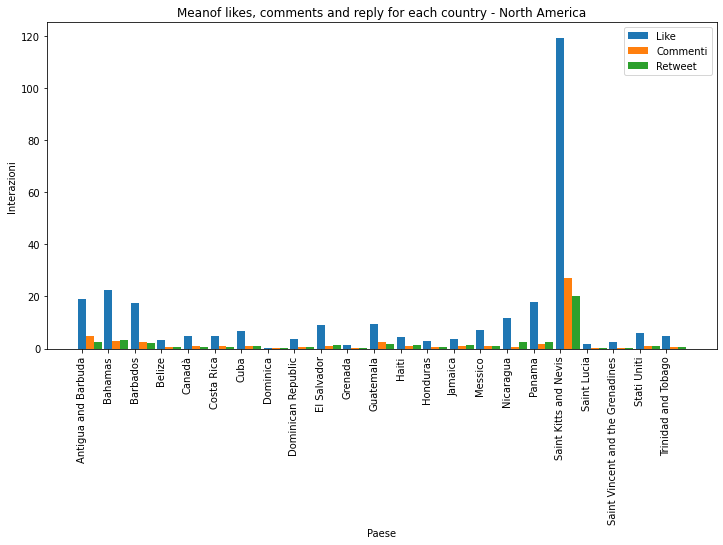

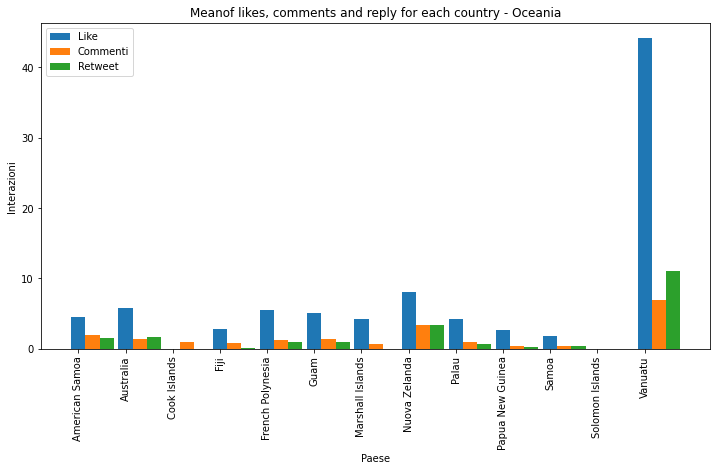

In [93]:
### OBIETTIVO 4 ###
plot_continent_sum(df_3, grouped)
plot_continent_mean(df_3, grouped)

#### Crollo 5/05/2022 - 18-05-2022 restringere fino al giorno del crollo

In [94]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_4 = df[(df['created_at'] >= '2022-05-08') & (df['created_at'] <= '2022-05-15')]
df_4 = df_4.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_4 = df_4.reset_index(drop=True)
display (df_4.head(15))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1525050479536795648,2022-05-13T09:49:03.000Z,To celebrate the launch of @asdigitalx we're g...,1496752391693209600,AllStarsDigital,AllStars Digital,40396,7,True,1525050479536795648,...,09f6a7707f18e0b1,Parigi,en,2624,69,1015,2571,NaN,NaN,Europe
1,1524732802276769792,2022-05-12T12:46:42.000Z,What is your first thought when you see my pic...,1389996858366472193,EstephaniaHa,Estephania_Ha,46351,107,False,1524732802276769792,...,f8a58bdeab0f9878,Hallstadt,en,1441,0,76,51,NaN,NaN,Europe
2,1525016776580698112,2022-05-13T07:35:07.000Z,พบเห็นใครจะ “ฆ่าตัวตาย” จากการขาดทุนเหรียญ Cry...,249467796,SatOsHiMeeN,มีนย์ จันทราวุฒิกร ☣️,6026,14,False,1525016776580698112,...,00c8243341e0d656,สวนหลวง,th,1341,10,29,2582,NaN,NaN,Asia
3,1524906557254914062,2022-05-13T00:17:09.000Z,Les gens qui ont tout mis dans la crypto #Cryp...,1495343850302365700,WaittyJ,🌈Waitty Jhon🇷🇪🏳️‍🌈,11,0,False,1524906557254914062,...,09f6a7707f18e0b1,Parigi,fr,997,2,30,108,NaN,NaN,Europe
4,1525035979064713216,2022-05-13T08:51:25.000Z,Make him play ‘Red Light- Green Light’\n\n@ter...,57589345,A_B_boying,charlie0.eth,527,42,False,1525035979064713216,...,317fcc4b21a604d5,Nuova Delhi,en,924,15,73,139,NaN,NaN,Asia
5,1524701544012156929,2022-05-12T10:42:30.000Z,A summary of what's happening to Crypto Market...,931600593046532097,JayeshKadu6,Sunny Kadu Patil,63,0,False,1524701544012156929,...,0a063651d547b2b9,Haveli,en,895,20,133,230,NaN,NaN,Asia
6,1523367370173353991,2022-05-08T18:20:58.000Z,There needs to be if then orders for crypto ex...,448621436,MattSchmenk,Matt 🔺🏔,4228,61,False,1523367370173353991,...,0043edef522966c1,Morgan,en,633,10,66,33,NaN,NaN,North America
7,1524928966657576960,2022-05-13T01:46:12.000Z,Crypto is like a casino without the free cockt...,1587143948,LasVegasLocally,Las Vegas Locally 🌴,255343,1049,False,1524928966657576960,...,5c2b5e46ab891f07,Las Vegas,en,541,6,42,74,NaN,NaN,North America
8,1525139234490929156,2022-05-13T15:41:43.000Z,25 Mayıs’a kadar yüzde 50 olma hedefimiz var. ...,1340377298558709760,kuzeyaliyeumtol,KUZEY ALİ KAZANDI🍯,2797,3,False,1525139234490929156,...,682c5a667856ef42,Turchia,tr,513,14,68,343,NaN,quoted,Asia
9,1523894024721080320,2022-05-10T05:13:42.000Z,Nada de lo que pasó esta semana ni hoy fue ine...,189230702,PabloSabbatella,pablito.eth 🦇🔊 🔜 ETHDenver ☃️,61011,634,False,1523894024721080320,...,0121b92345f0e2b4,Miami Beach,es,491,5,22,33,NaN,NaN,North America


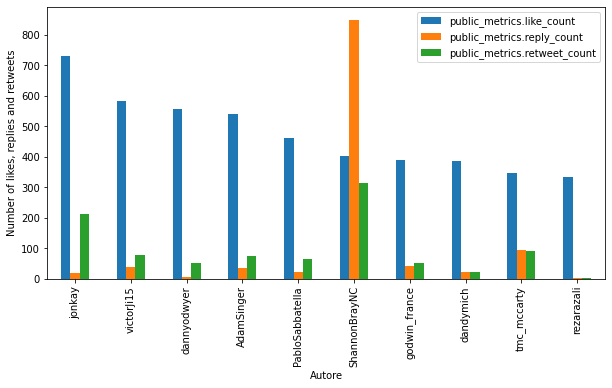

In [95]:
#df_4=pd.DataFrame(df_4,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df4_sorted = df_4.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df4_top10 = df1_sorted.head(10)
# Plotta il dataframe
df4_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


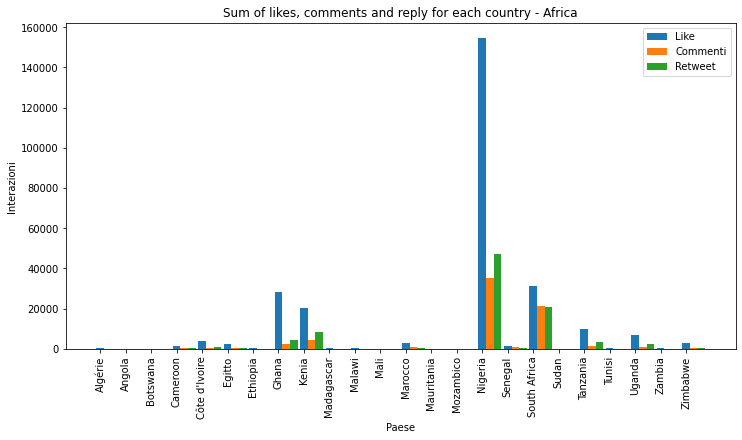

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

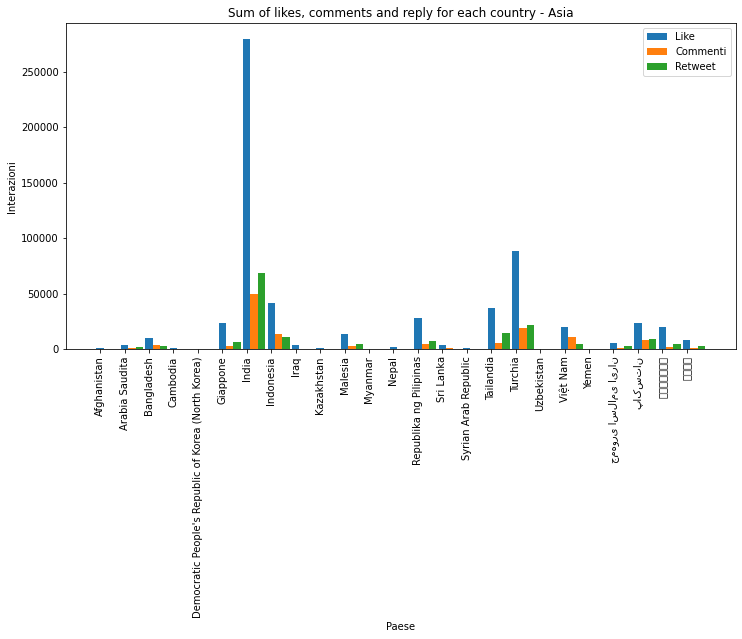

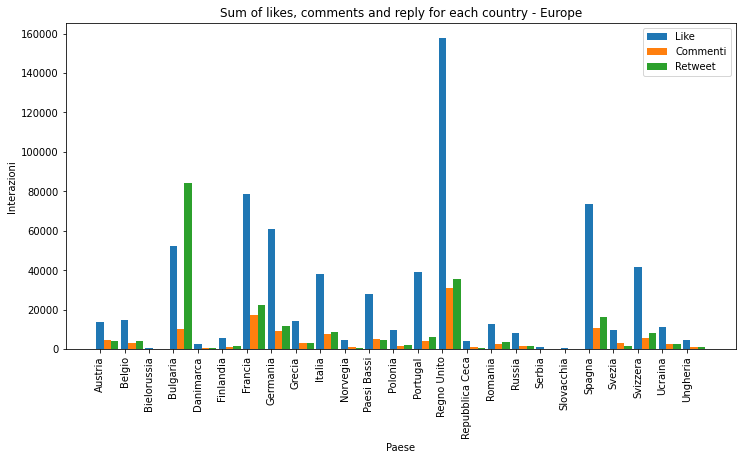

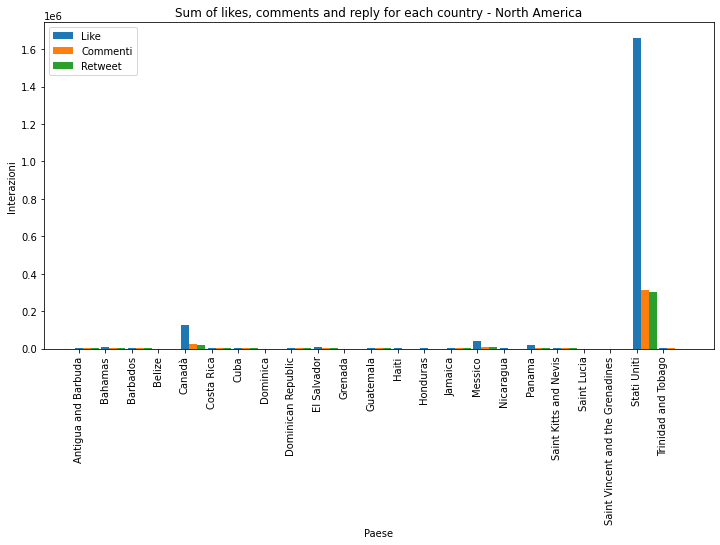

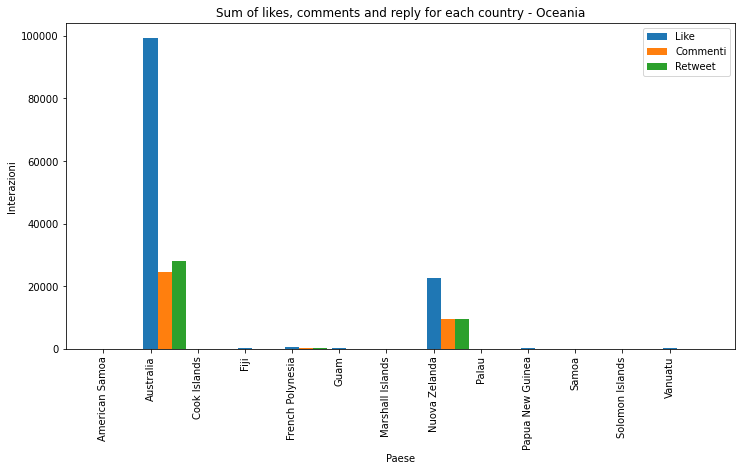

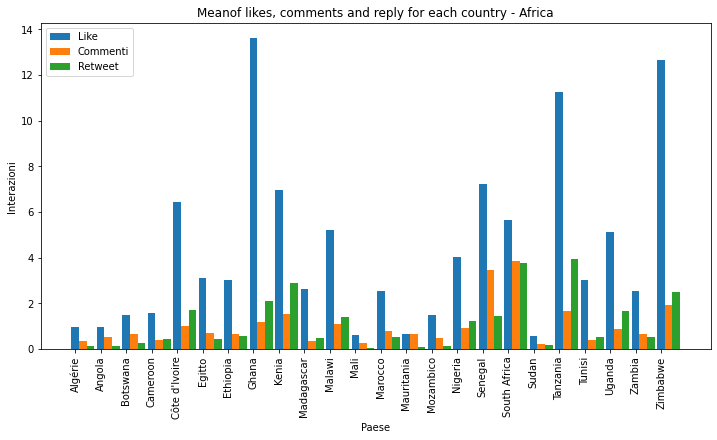

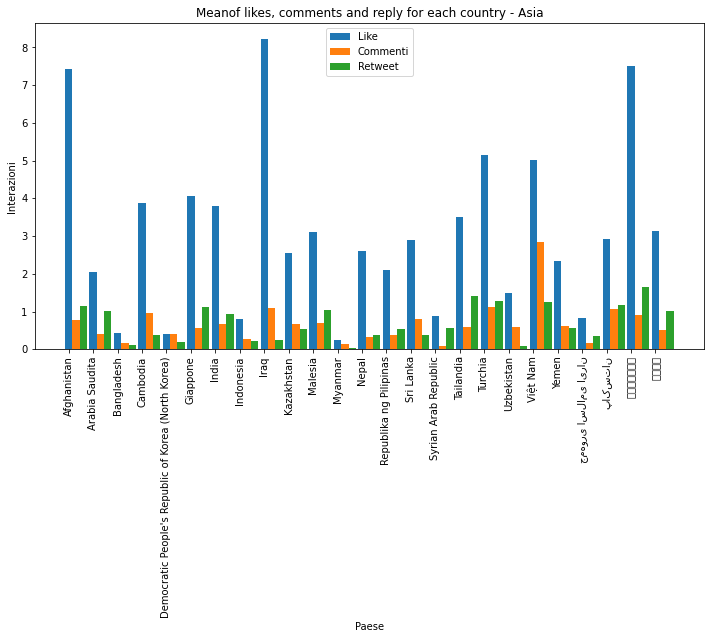

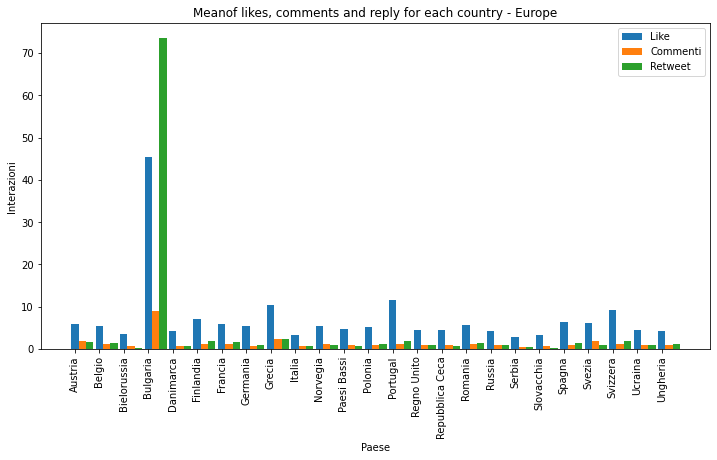

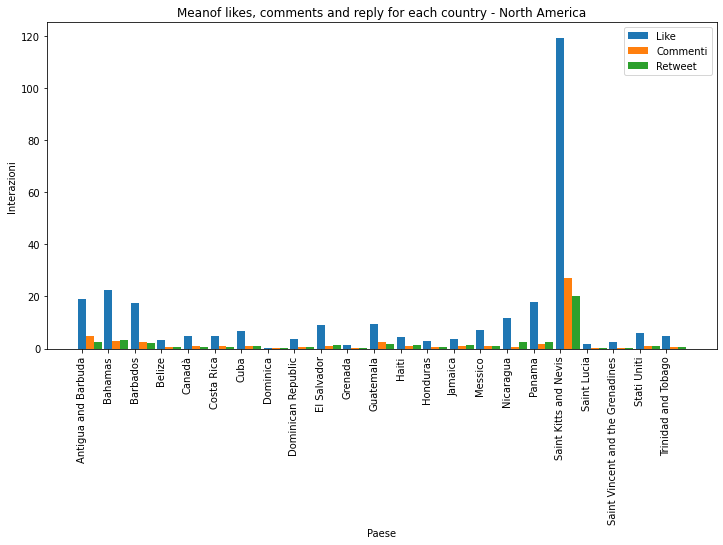

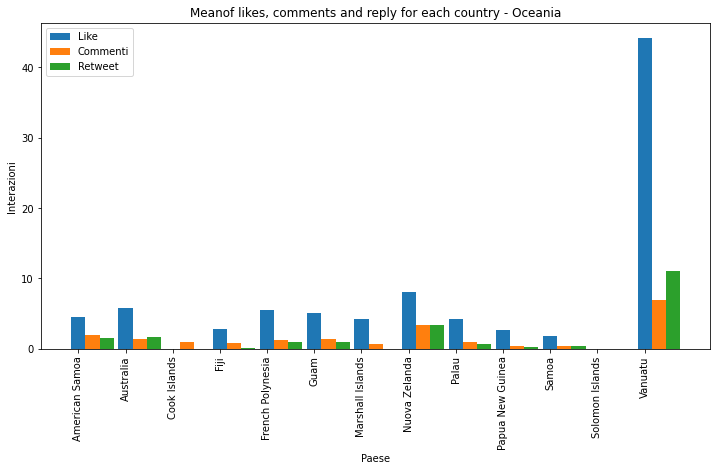

In [96]:
### OBIETTIVO 4 ###
plot_continent_sum(df_4, grouped)
plot_continent_mean(df_4, grouped)

#### Obiettivo 2 - Capire il tipo di interazione tra gli utenti

In [ ]:
# Selezioniamo le feature per l'analisi della frequenza delle interazioni
features = ['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count', 'created_at']
X = df[features]

# Normalizzazione dei dati
X = (X - X.mean()) / X.std()

# Utilizziamo l'algoritmo k-means per raggruppare i tweet in 5 cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Aggiungiamo i label di cluster al dataframe
df['cluster'] = kmeans.labels_

# Visualizziamo i cluster
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Numero di like')
plt.ylabel('Numero di commenti')
plt.title('Raggruppamento dei tweet in base alle interazioni')
plt.show()

# Visualizziamo il numero di tweet in ogni cluster
print(df['cluster'].value_counts())

# Visualizziamo le statistiche delle interazioni per ogni cluster
print(df.groupby('cluster')[features].mean())


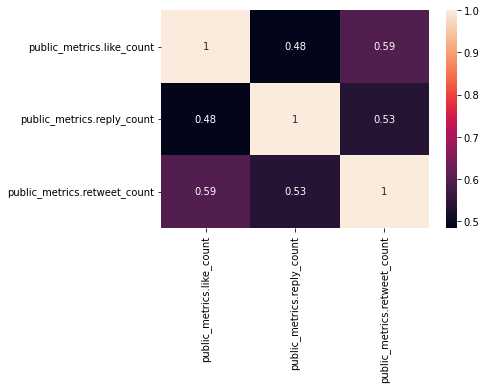

In [ ]:
#correlation matrix
#take only public_metrics.like_count, public_metrics.reply_count, public_metrics.retweet_count
df = df[['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count']]
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


Media di likes per tweet: 129.50382947573058
Media di retweets per tweet: 62.723507359234304
Media di commenti per tweet: 34.801099583902726
Tasso di interazione: 22702.84364188676


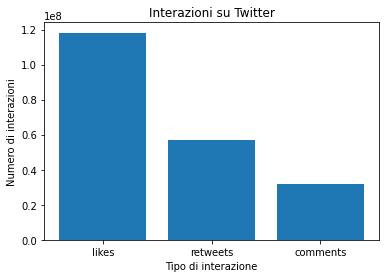

In [ ]:
df_means = df[['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count', 'created_at']]
# calcola la media delle interazioni per tweet
mean_likes = df_means['public_metrics.like_count'].mean()
mean_retweets = df_means['public_metrics.retweet_count'].mean() 
mean_comments = df_means['public_metrics.reply_count'].mean()

# calcola il tasso di interazione
total_tweets = len(df_means.index)
total_interactions = df_means['public_metrics.like_count'].sum() + df_means['public_metrics.retweet_count'].sum() + df_means['public_metrics.reply_count'].sum()
interaction_rate = total_interactions / total_tweets * 100

# stampa le metriche
print("Media di likes per tweet:", mean_likes)
print("Media di retweets per tweet:", mean_retweets)
print("Media di commenti per tweet:", mean_comments)
print("Tasso di interazione:", interaction_rate)

# crea un grafico a barre delle interazioni per tweet
interactions = ['likes', 'retweets', 'comments']
values = [df_means['public_metrics.like_count'].sum(), df_means['public_metrics.retweet_count'].sum(), df_means['public_metrics.reply_count'].sum()]
plt.bar(interactions, values)
plt.xlabel("Tipo di interazione")
plt.ylabel("Numero di interazioni")
plt.title("Interazioni su Twitter")
plt.show()


In [ ]:
# seleziona solo alcune colonne del dataframe
df = df[['id', 'public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count', 'created_at']]

# converte la colonna 'created_at' in formato datetime e imposta come indice
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df.set_index('created_at', inplace=True)

# rimuove le righe con valori null nella colonna 'created_at'
df.dropna(subset=['created_at'], inplace=True)

# calcola il tasso di interazione nel tempo
interaction_count = df.resample('D').sum()['public_metrics.like_count'] + df.resample('D').sum()['public_metrics.retweet_count'] + df.resample('D').sum()['public_metrics.reply_count']
interaction_rate_over_time = interaction_count / df.resample('D').count()['id'] * 100

# traccia il grafico a linee del tasso di interazione su Twitter
plt.plot(interaction_rate_over_time)
plt.xlabel("Data")
plt.ylabel("Tasso di interazione")
plt.title("Tasso di interazione su Twitter")
plt.show()


KeyError: ['created_at']

### Obiettivo 3

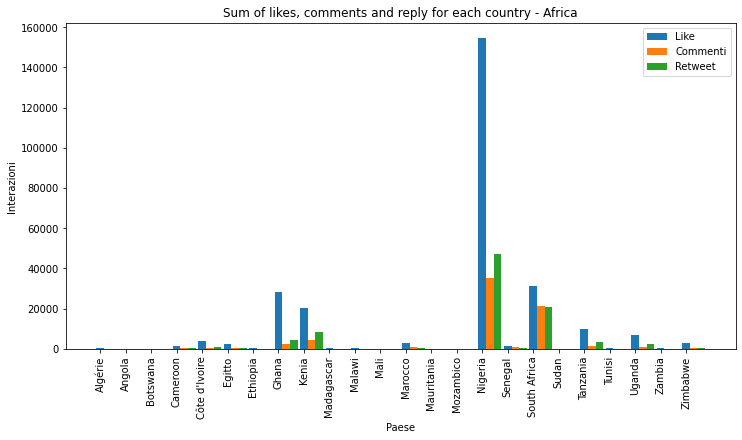

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

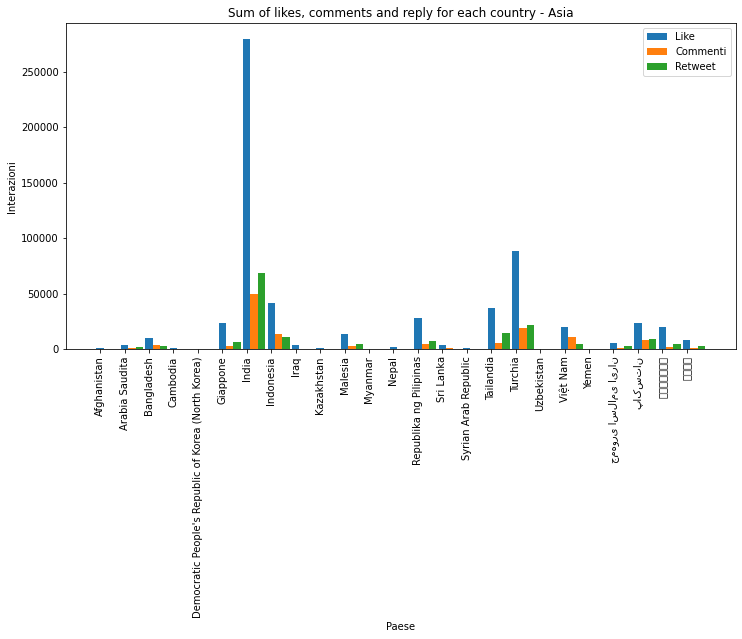

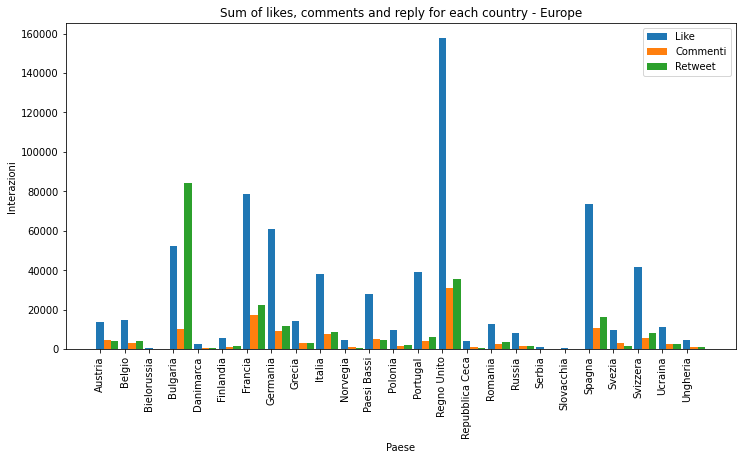

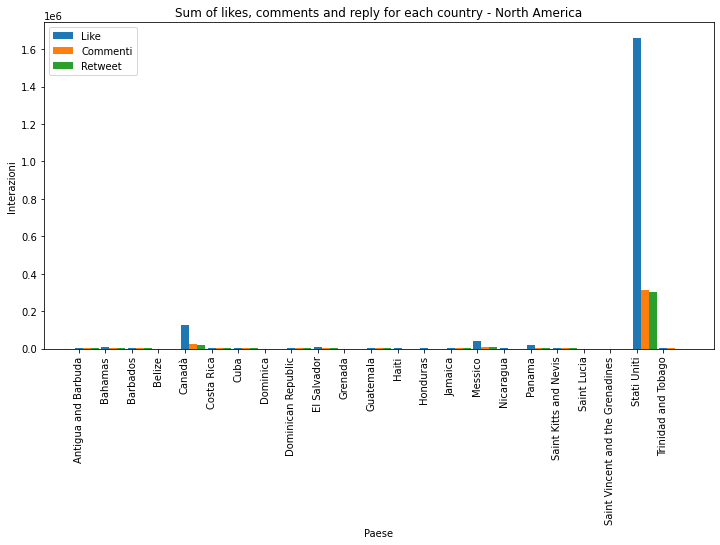

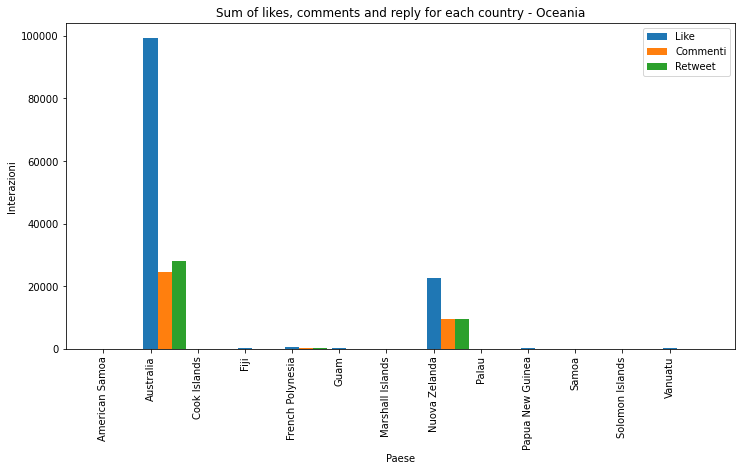

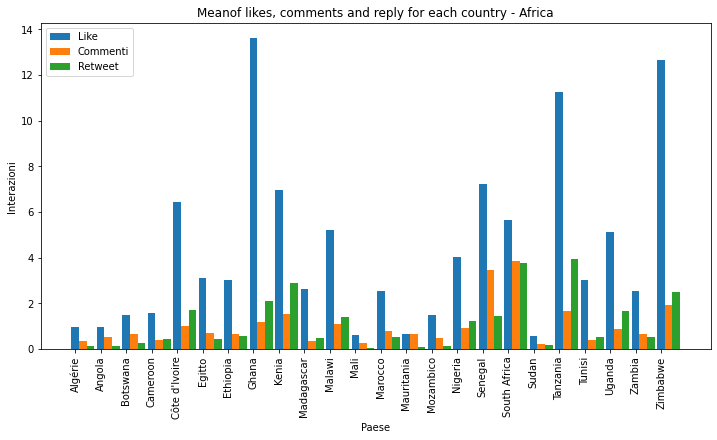

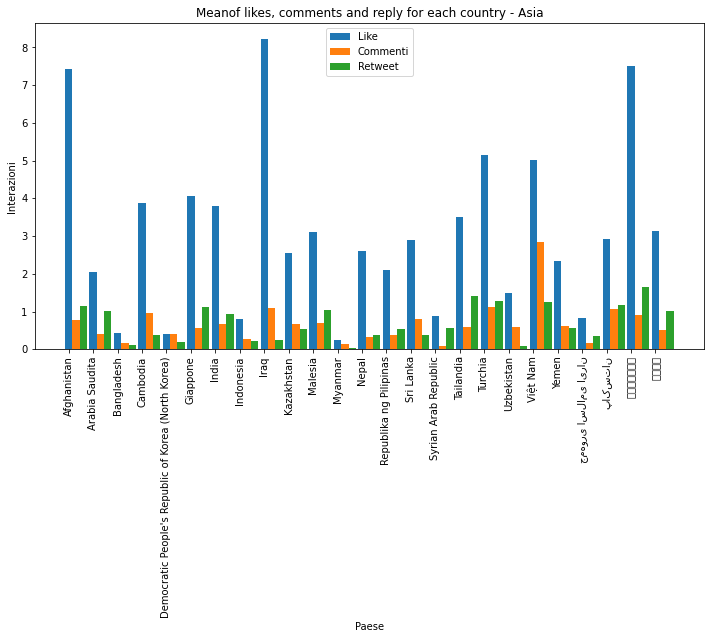

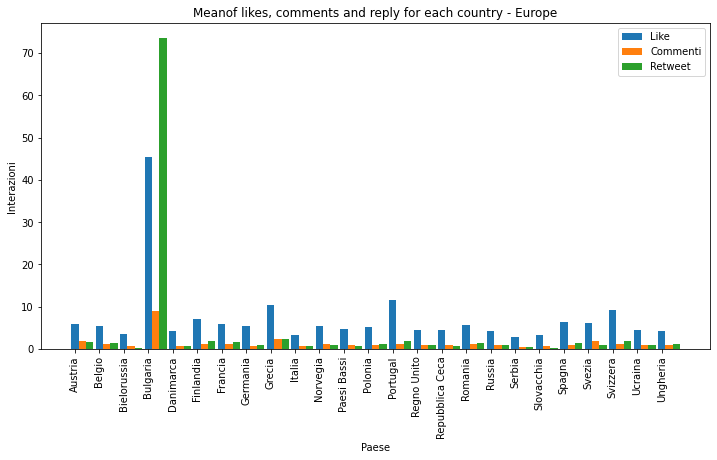

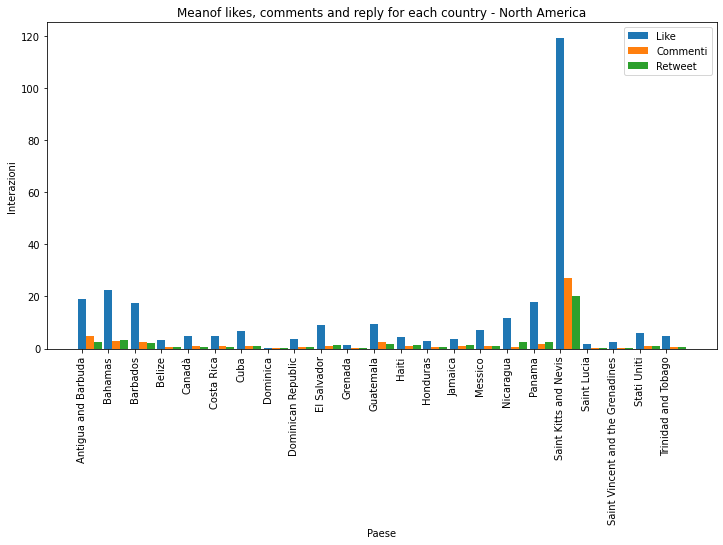

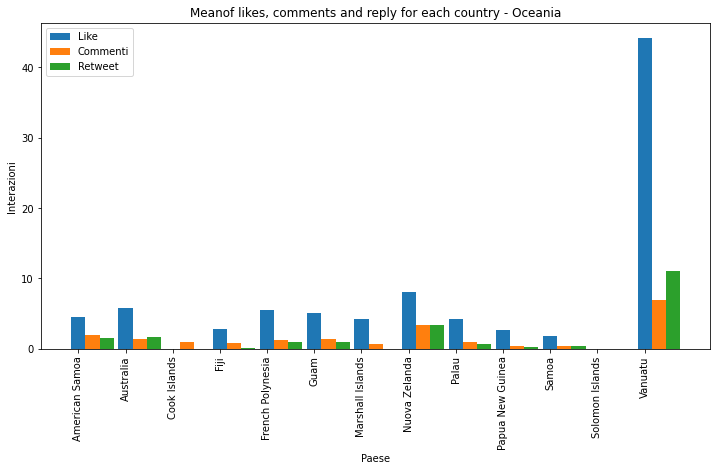

In [97]:
### OBIETTIVO 3 ###
plot_continent_sum(df, grouped)
plot_continent_mean(df, grouped)